What are some major differences between the North American, European, and Japanese video game markets?

What video game genres are trending in each market?

What features about a video game are most indicative of its success?



Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [3]:
import pandas as pd
vgsales = pd.read_csv('vgsales.txt')
print(vgsales.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(vgsales, title='Pandas Profiling Report')
profile.to_file(output_file='vgsales.html')

In [6]:
print(len(vgsales))
vgsales = vgsales.dropna()
print(len(vgsales))

16598
16291


In [7]:
vgsales_NA = vgsales[vgsales['NA_Sales']!= 0]
vgsales_EU = vgsales[vgsales['EU_Sales']!= 0]
vgsales_JP = vgsales[vgsales['JP_Sales']!= 0]

print(len(vgsales_NA))
print(len(vgsales_EU))
print(len(vgsales_JP))

11861
10667
6084


<AxesSubplot:>

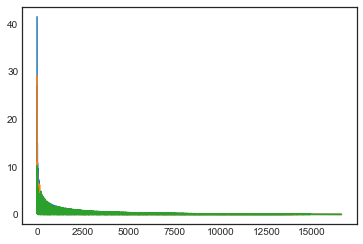

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-white')

In [20]:
def df_transform(df, col, time_col):
    df_out = df.groupby([time_col,col])['Name'].count()
    df_out = df_out.reset_index()
    df_out['count'] = df_out['Name']
    df_out.drop(columns=['Name'], inplace = True)
    return df_out

In [ ]:
def plot_trends(df, col, time_col, lst=None):
    if lst is None:
        df=df
    else:
        lst = lst
        df = df[df[col].isin(lst)]

    fig, ax = plt.subplots()
    for key, data in df.groupby(col):
        data.plot(x=time_col, y='count',ax = ax, label=key, rot = 90)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),
          fancybox=True, shadow=True, ncol=5)
    plt.show()

*Platform Analysis*

<AxesSubplot:>

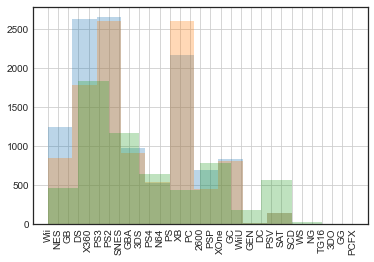

In [45]:
vgsales_NA['Platform'].hist(xrot = 90, alpha = 0.3)
vgsales_EU['Platform'].hist(xrot = 90, alpha = 0.3)
vgsales_JP['Platform'].hist(xrot = 90, alpha = 0.3)

In [27]:
lst_platforms = ['DS',
'PS2',
'PS3',
'Wii',
'X360',
'PSP',
'PS',
'PC',
'XB',
'GBA']

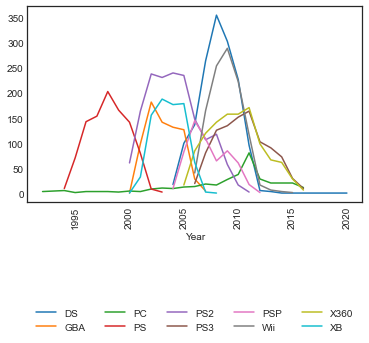

In [28]:
NA = df_transform(vgsales_NA, 'Platform', 'Year')
plot_trends(NA, 'Platform', 'Year', lst=lst_platforms)

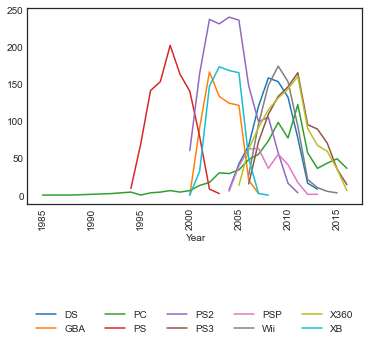

In [29]:
EU = df_transform(vgsales_EU, 'Platform', 'Year')
plot_trends(EU, 'Platform', 'Year', lst=lst_platforms)

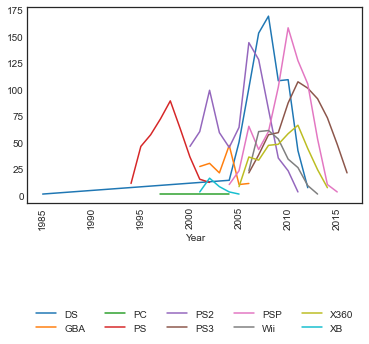

In [30]:
JP = df_transform(vgsales_JP, 'Platform', 'Year')
plot_trends(JP, 'Platform', 'Year', lst=lst_platforms)


*Genre Analysis*

<AxesSubplot:>

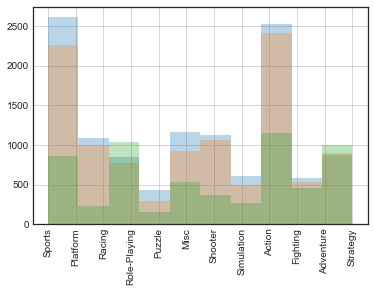

In [44]:
vgsales_NA['Genre'].hist(xrot = 90, alpha = 0.3)
vgsales_EU['Genre'].hist(xrot = 90, alpha = 0.3)
vgsales_JP['Genre'].hist(xrot = 90, alpha = 0.3)

In [49]:
lst_genre = ['Action',
'Sports',
'Misc',
'Role-Playing',
'Shooter',
'Adventure',
'Racing']

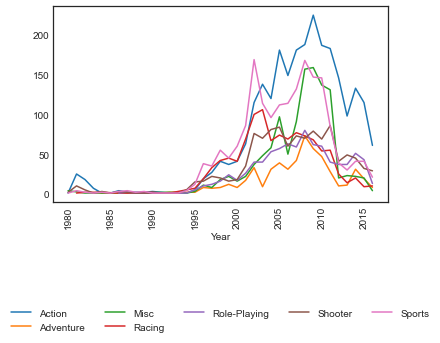

In [50]:
NA = df_transform(vgsales_NA, 'Genre', 'Year')
plot_trends(NA, 'Genre', 'Year', lst = lst_genre)

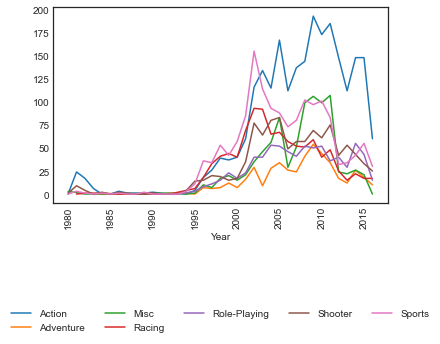

In [51]:
EU = df_transform(vgsales_EU, 'Genre', 'Year')
plot_trends(EU, 'Genre', 'Year', lst = lst_genre)

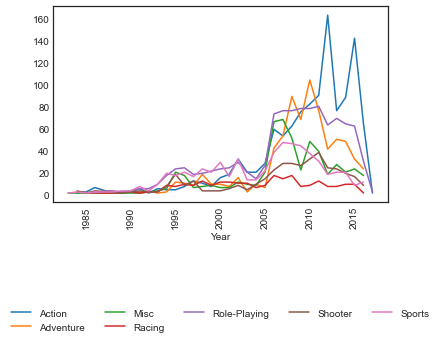

In [52]:
JP = df_transform(vgsales_JP, 'Genre', 'Year')
plot_trends(JP, 'Genre', 'Year', lst = lst_genre)


*Publisher Analysis*


In [57]:
lst_publisher = ['Electronic Arts',
'Activision',
'Namco Bandai Games',
'Ubisoft',
'Konami Digital Entertainment',
'THQ',
'Nintendo',
'Sony Computer Entertainment',
'Sega',
'Take-Two Interactive']

<AxesSubplot:>

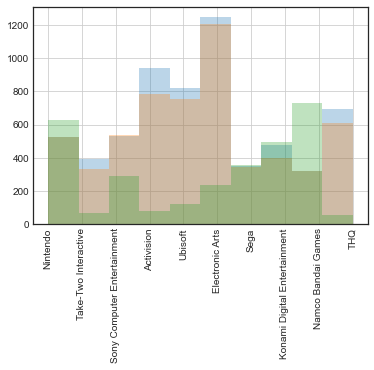

In [63]:
NA_publ = vgsales_NA[vgsales_NA['Publisher'].isin(lst_publisher)]
EU_publ = vgsales_EU[vgsales_EU['Publisher'].isin(lst_publisher)]
JP_publ = vgsales_JP[vgsales_JP['Publisher'].isin(lst_publisher)]

NA_publ['Publisher'].hist(xrot = 90, alpha = 0.3)
EU_publ['Publisher'].hist(xrot = 90, alpha = 0.3)
JP_publ['Publisher'].hist(xrot = 90, alpha = 0.3)

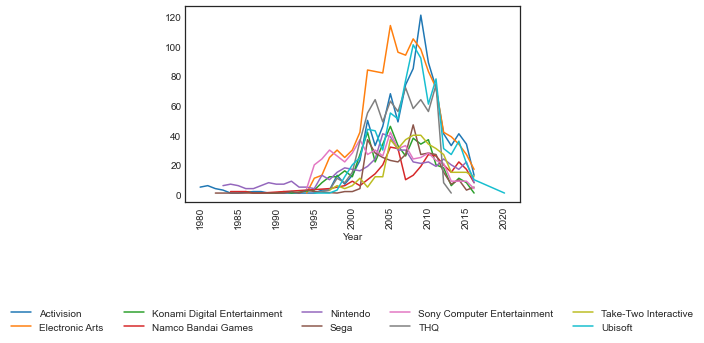

In [58]:
NA = df_transform(vgsales_NA, 'Publisher', 'Year')
plot_trends(NA, 'Publisher', 'Year', lst = lst_publisher)

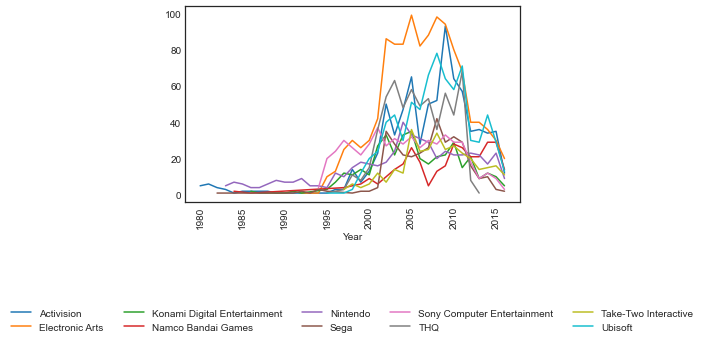

In [59]:
EU = df_transform(vgsales_EU, 'Publisher', 'Year')
plot_trends(EU, 'Publisher', 'Year', lst = lst_publisher)

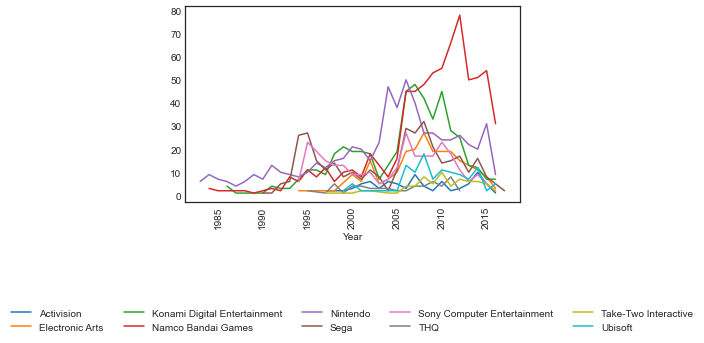

In [61]:
JP = df_transform(vgsales_JP, 'Publisher', 'Year')
plot_trends(JP, 'Publisher', 'Year', lst = lst_publisher)

**Sales Analysis**

In [67]:
df_sales = vgsales[['Platform',  'Genre', 'Publisher','Year', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']]

In [82]:
# split data into X and y
to_encode = ['Platform',  'Genre', 'Publisher']

In [87]:
df = pd.get_dummies(data=df_sales,columns=to_encode)

In [108]:
#https://github.com/dmlc/xgboost/issues/357
from  xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = df.drop(columns = ['Global_Sales'])
Y = df['Global_Sales']
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=0)
# fit model no training data
model = XGBRegressor()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=5, scoring = 'neg_mean_absolute_error')
print("Negative MAE: %.2f" % (results.mean()))

/Users/chiara/opt/anaconda3/envs/vgsales/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


MAE: -30.70%


In [111]:
model.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
sorted_idx = model.feature_importances_.argsort()
sorted_idx=sorted_idx[-15:]

Text(0.5, 0, 'Xgboost Feature Importance')

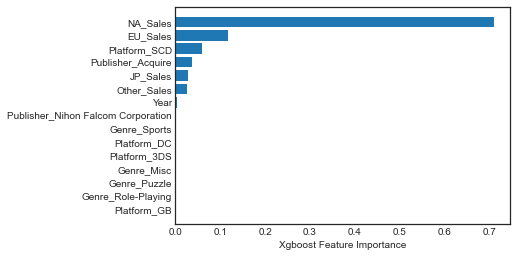

In [113]:
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")



***Appendix***

What happens when the most relevant features are removed from the model?

The MAE score doubles, suggesting that the model has lost predictive power.

In [114]:
X = df.drop(columns = ['Global_Sales','Year', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales'])
Y = df['Global_Sales']
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=0)
# fit model no training data
model = XGBRegressor()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=5, scoring = 'neg_mean_absolute_error')
print("Negative MAE: %.2f" % (results.mean()))

/Users/chiara/opt/anaconda3/envs/vgsales/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


MAE: -0.64


In [115]:
model.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
sorted_idx = model.feature_importances_.argsort()
sorted_idx=sorted_idx[-15:]

Text(0.5, 0, 'Xgboost Feature Importance')

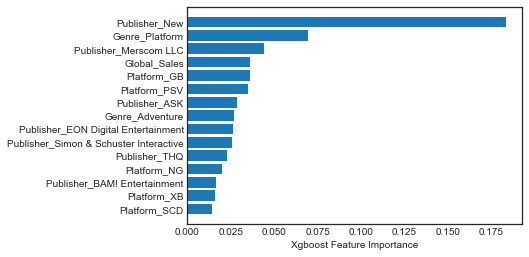

In [117]:
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")